<a href="https://colab.research.google.com/github/CruzElizorios/aprendiendo-python/blob/main/Archivos_Julian_Leandro_I%C3%B1aki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

explicación como abrir archivo:


```
archivo = open("nombre_del_archivo.extension", mode='rw') #el mode permite leer 'r', escribir 'w', o ambas con 'rw'
archivo.read() # lee todo el archivo
archivo.readlines() # lee hasta los saltos de lineas
archivo.write("hola") # para escribir en el archivo
archivo.close() #para cerrar el archivo

#manera correcta para abrir los archivos en python: cierra automaticamente el archivo cuando sale del scope
with open("nombre_del_archivo.extension", mode='w') as archivo:
  archivo.write("hola")
  #ahora no es necesario escribir el .close()

para descargar un archivo ⬇
! gdown (link de donde descargar el archivo)
```

In [ ]:
! gdown https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2020.csv
! gdown https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2021.csv
! gdown https://datos-abiertos.mingeneros.gob.ar/datos/linea144-enero-diciembre-2022.csv

Downloading...
From: https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2020.csv
To: /content/linea144-2020.csv
100% 2.76M/2.76M [00:02<00:00, 1.38MB/s]
Downloading...
From: https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2021.csv
To: /content/linea144-2021.csv
100% 2.36M/2.36M [00:02<00:00, 1.18MB/s]
Downloading...
From: https://datos-abiertos.mingeneros.gob.ar/datos/linea144-enero-diciembre-2022.csv
To: /content/linea144-enero-diciembre-2022.csv
100% 2.31M/2.31M [00:02<00:00, 1.15MB/s]


# Consignas TP Semana 11 24/05/24 :
**a)** Leer los archivos linea144-2020.csv, linea144-2021.csv y linea144-enero-diciembre-2022.csv y generar un nuevo archivo llamado linea144-2020-2023.csv con los datos de los archivos anteriores exceptuando aquellos registros con fecha nula. https://www.datos.gob.ar/dataset/generos-base-datos-linea-144

**b)** Recorrer el archivo linea144-2020-2023.csv y generar una estructura de datos que permita almacenar los nombres de las provincias y la cantidad total de llamadas en esa provincia.

In [ ]:
import csv
with open("linea144-2020.csv", mode='r') as dataset:
  contenido = dataset.readlines()
  print(contenido)


['\ufefffecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora\n', '2020-01-01,Tucumán,Mujer,,,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon\n', '2020-01-01,Buenos Aires,Mujer,39,,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon\n', '2020-01-01,Buenos Aires,Mujer,22,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon\n', '2020-01-01,Buenos Aires,Mujer,53,,No,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Va

In [ ]:
#siempre trabajar asi para abrir un archivo
import csv
with open("linea144-2020.csv", mode='r') as dataset:
  contenido = csv.reader(dataset)
  listaContenido = list(contenido)
  lista2020 = []
  for linea in listaContenido:
    # if (type(linea[0]) == str):
    #   print(linea[0])
    #   #lista2020.append(linea)
    if (type(linea[0]) != str):
      print(linea[0])
      lista2020.remove(linea)
  print(lista2020)

[]


In [ ]:
lista = [["balo",23,"arg"],["fran",45,"ing"],["ana",99,"arg"]]

for linea in lista:
  if(linea[1] > 67):
    lista.remove(linea)
print(lista)

[['balo', 23, 'arg'], ['fran', 45, 'ing']]


In [ ]:
lista = [["balo",23,"arg"],[None,45,"ing"],["ana",99,"arg"],["",99,"arg"]]
#probando como funciona remove
for linea in lista:
  if(type(linea[0]) != str or linea[0] == ""):
    print(linea)
    lista.remove(linea)
print(f"La lista queda asi: {lista}")
#print(lista)

[None, 45, 'ing']
['', 99, 'arg']
La lista queda asi: [['balo', 23, 'arg'], ['ana', 99, 'arg']]


In [ ]:
a = ["balo",23,"arg"]
b = ["casa",320,897]
a.append(b)
print(a)
a.extend(b)
print(a)

['balo', 23, 'arg', ['casa', 320, 897]]
['balo', 23, 'arg', ['casa', 320, 897], 'casa', 320, 897]


In [ ]:
import csv
with open("linea144-2020.csv", mode='r') as dataset:
  linea2020 = csv.reader(dataset)
  #hay un error en el if por lo que termina devolviendo un archivo vacio,sin los for logra
  #unir los tres archivos pero tambien agrega los encabezados
  for fila in linea2020:
    if (fila[0] == ''):
      #print(f"estoy vacia:  {fila[0]}")
      #el metodo remove no existe porque no es una lista, y por eso da error, deberia convertirse en una lista antes y así funcionaria
      linea2020.remove(fila)

  with open("linea144-2021.csv", mode='r') as dataset2:
    linea2021 = csv.reader(dataset2)
    for fila in linea2021:
      if (fila[0] == ''):
        #print(f"estoy vacia:  {fila[0]}")
        linea2021.remove(fila)

    with open("linea144-enero-diciembre-2022.csv", mode='r') as dataset3:
      linea2022 = csv.reader(dataset3)
      for fila in linea2022:
        if (fila[0] == ''):
          #print(f"estoy vacia:  {fila[0]}")
          linea2022.remove(fila)

      #Aca se crea el nuevo archivo en base a los anterios
      with open("linea144-2020-2022.csv", mode='w' ) as nuevaData:
        contenidoTotal = csv.writer(nuevaData)
        contenidoTotal.writerows(linea2020)
        contenidoTotal.writerows(linea2021)
        contenidoTotal.writerows(linea2022)

        with open("linea144-2020a2022.csv", mode='r') as data:
          contenido22 = csv.reader(data)
          for fila in contenido22:
            print(fila)

Ejercicio A completo:

In [ ]:
import csv
#descarga desde la pagina oficial los siguientes 3 archivos:
! gdown https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2020.csv
! gdown https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2021.csv
! gdown https://datos-abiertos.mingeneros.gob.ar/datos/linea144-enero-diciembre-2022.csv

listaArchivos = ["linea144-2020.csv", "linea144-2021.csv", "linea144-enero-diciembre-2022.csv"]
listaCompleta = []

#Lee los datos en cada archivo, agrega los datos que tienen una fecha en listaCompleta
for archivo in listaArchivos:
  with open(archivo, mode='r') as dataset:
    contenido = csv.reader(dataset)
    for linea in contenido:
      #verificacion de que no esten vacias las fechas y las provincias
      if(linea[0] != '' and linea[1] != ''):
        listaCompleta.append(linea)
      else:
        continue
#crea un nuevo archivo csv con los datos que estan en listaCompleta
with open("linea144-2020-2022.csv", mode='w') as datosCSV:
  contenidoTotal = csv.writer(datosCSV)
  encabezado = ""
  for linea in listaCompleta:
    #el encabezado se repite en cada archivo osea 3 veces, de esta manera los quito
    if(linea[1] == "prov_residencia_persona_en_situacion_violencia"):
        #print(linea)
        encabezado = linea
        listaCompleta.remove(linea)
  #agrega los titulos en el archivo, en la primera linea
  contenidoTotal.writerow(encabezado)
  #escribe cada lista de la listaCompleta en el archivo nuevo
  for linea in listaCompleta:
    contenidoTotal.writerow(linea)

Downloading...
From: https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2020.csv
To: /content/linea144-2020.csv
100% 2.76M/2.76M [00:01<00:00, 2.05MB/s]
Downloading...
From: https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2021.csv
To: /content/linea144-2021.csv
100% 2.36M/2.36M [00:01<00:00, 1.99MB/s]
Downloading...
From: https://datos-abiertos.mingeneros.gob.ar/datos/linea144-enero-diciembre-2022.csv
To: /content/linea144-enero-diciembre-2022.csv
100% 2.31M/2.31M [00:01<00:00, 1.70MB/s]


In [ ]:
import csv
#Funciona bien
def fusionarArchivosCSV(lista_archivos_entrada: list[str],archivo_salida: str) -> None:
  """
  fusionarArchivosCSV recibe una lista con los nombres de los archivos a fusionar archivo (con el formato
  publicado de la linea 144) y genera un nuevo archivo en memoria con todos los contenidos de los archivos
  recien mencionados. No devuelve nada.
  """
  # pregunta: lo escribo directo o lo puedo guardar en una lista y despues escribirlo
  listaCompleta = []
  encabezado = ""
  #Lee los datos en cada archivo, agrega los datos que tienen una fecha en listaCompleta
  for archivo in lista_archivos_entrada:
    with open(archivo, mode='r') as dataset:
      contenido = csv.reader(dataset)

      encabezado = next(contenido)
      for linea in contenido:
        #verificacion de que no esten vacias las fechas y las provincias
        fecha = linea[0]
        provincia = linea[1]
        if(fecha != '' and provincia != ''):
          #---modificación para que estandarizar los nombres de las provincias
          linea[1] = linea[1].title()
          #---modificación para que solo exita una Córdoba---
          if(provincia == "Cordoba"):
            linea[1] = "Córdoba"
          listaCompleta.append(linea)

  #crea un nuevo archivo csv con los datos que estan en listaCompleta
  with open(archivo_salida, mode='w') as datosCSV:
    contenidoTotal = csv.writer(datosCSV)
    #agrega los titulos en el archivo, en la primera linea
    contenidoTotal.writerow(encabezado)
    #escribe cada lista de la listaCompleta en el archivo nuevo
    for linea in listaCompleta:
      contenidoTotal.writerow(linea)
    return print(f"El archivo {archivo_salida} ha sido creado")

#help(fusionarArchivosCSV)

#invocar la función
fusionarArchivosCSV(["linea144-2020.csv","linea144-2021.csv","linea144-enero-diciembre-2022.csv"],"datos_filtrados.csv")

El archivo datos_filtrados.csv ha sido creado


Ejercicio B completo: b) Recorrer el archivo linea144-2020-2022.csv y generar una estructura de datos que permita almacenar los nombres de las provincias y la cantidad total de llamadas en esa provincia.

In [ ]:
llamadasEnProvincias = {}

with open("datos_filtrados.csv", mode='r') as dataset:
  contenido = csv.reader(dataset)
  #recorro por linea y selecciono la provincia
  for linea in contenido:
    if(linea[1] == "prov_residencia_persona_en_situacion_violencia"):
      #se añade otro if para saltear el titulo de la columna
      continue
    else:
      #si ya esta dentro del diccionario, devuelve True y entonces le suma 1
      if(linea[1] in llamadasEnProvincias):
        llamadasEnProvincias[linea[1]] += 1
      else:
        llamadasEnProvincias[linea[1]] = 1

  cantProvincias = 0
  for provincia in llamadasEnProvincias:
    cantProvincias+=1
  print(llamadasEnProvincias,"\n Cantidad de Provincias:",cantProvincias)


{'Tucumán': 2828, 'Buenos Aires': 43579, 'Santiago Del Estero': 473, 'Santa Fe': 3263, 'San Juan': 578, 'Catamarca': 253, 'Neuquén': 522, 'Mendoza': 2791, 'Córdoba': 2186, 'Río Negro': 405, 'Ciudad Autónoma De Buenos Aires': 15470, 'Salta': 1111, 'Entre Ríos': 533, 'Jujuy': 1102, 'Chaco': 682, 'Chubut': 250, 'San Luis': 603, 'La Pampa': 76, 'Misiones': 468, 'Formosa': 305, 'Tierra Del Fuego, Antártida E Islas Del Atlántico Sur': 81, 'Corrientes': 448, 'Santa Cruz': 125, 'La Rioja': 269} 
 Cantidad de Provincias: 24


In [ ]:
dic1 = {'Tucumán': 20, 'Buenos Aires': 9, 'Santiago Del Estero': 12}
dic2 = {'Buenos Aires': 5, 'Santiago Del Estero': 1, 'Tucumán': 4}

nuevoDic = {}
for provincia in dic1:
  nuevoDic[provincia] = (dic1[provincia], dic2[provincia])
print(nuevoDic)
segundosValores = nuevoDic.values()
print(segundosValores)

{'Tucumán': (20, 4), 'Buenos Aires': (9, 5), 'Santiago Del Estero': (12, 1)}
dict_values([(20, 4), (9, 5), (12, 1)])


[20, 10, 30, 12] [0, 5, 15, 6]
dict_keys(['Tucumán', 'Buenos Aires', 'Santiago Del Estero', 'Santa Fe'])


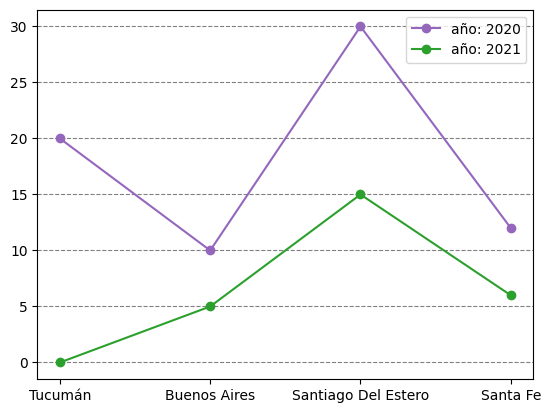

In [ ]:
lista2dics = [{'Tucumán': 20, 'Buenos Aires': 10, 'Santiago Del Estero': 30, 'Santa Fe': 12},
 {'Buenos Aires': 5, 'Santa Fe': 6, 'Santiago Del Estero': 15}]
lista1 = []
lista2 = []
for prov in lista2dics[0].keys():
  var = lista2dics[0][prov]

  if( prov not in lista2dics[1]):
    lista2dics[1][prov] = 0
    var2 = lista2dics[1][prov]
  else:
    var2 = lista2dics[1][prov]
  lista1.append(var)
  lista2.append(var2)
print(lista1,lista2)
print(lista2dics[0].keys())

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(lista2dics[0].keys(), lista1, label = 'año: 2020', color = 'tab:purple', marker = 'o')
ax.plot(lista2dics[0].keys(), lista2, label = 'año: 2021', color = 'tab:green', marker = 'o')
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
ax.legend(loc = 'upper right')
plt.show()

In [ ]:
pepe = {'Tucumán': 20, 'Buenos Aires': 10, 'Santiago Del Estero': 30, 'Santa Fe': 12}
for prov in pepe:
  if( prov not in pepe):
    print("entre")
  else:
    print("no entre")


no entre
no entre
no entre
no entre


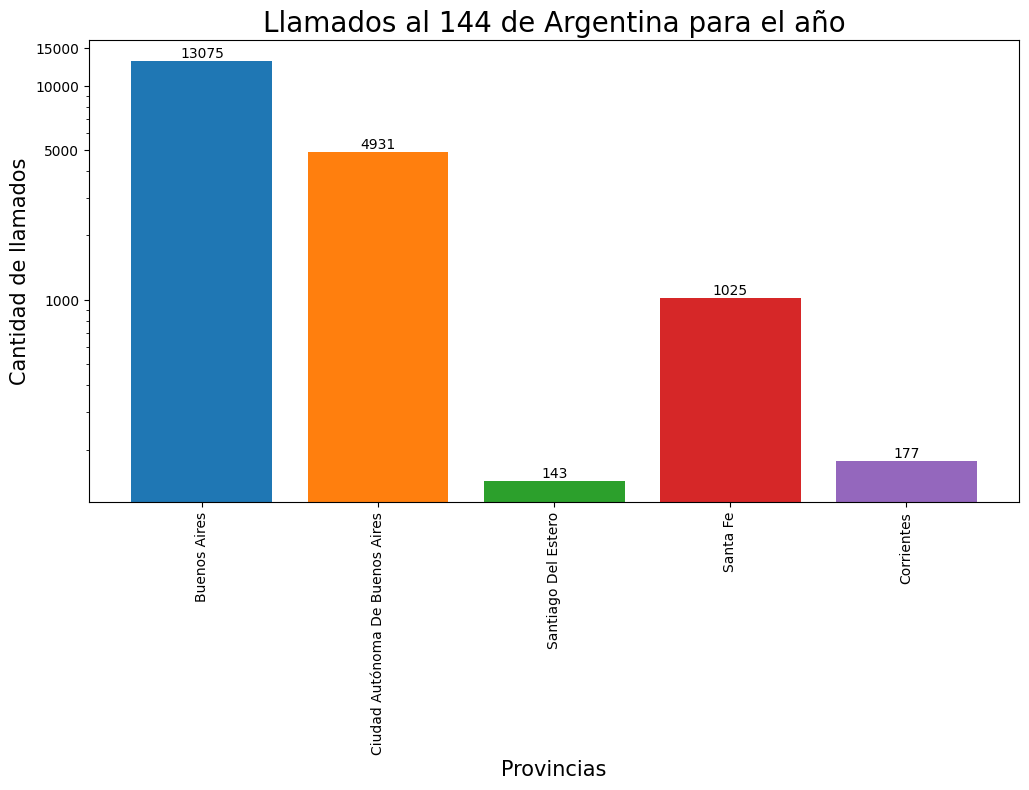

In [ ]:
import matplotlib.pyplot as plt

cant_llamadas_por_provincia = {
    'Buenos Aires': 13075,
    'Ciudad Autónoma De Buenos Aires': 4931,
    'Santiago Del Estero': 143,
    'Santa Fe': 1025,
    'Corrientes': 177
}

plt.figure(figsize=(12, 6))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.xlabel('Provincias', fontsize=15)
plt.ylabel('Cantidad de llamados', fontsize=15)
plt.title(f'Llamados al 144 de Argentina para el año', fontsize=20)

#Especifica las ubicaciones de las marcas en el eje Y (puedes ajustar según tus necesidades)
yticks_values = [10, 100, 1000, 5000,10000, 15000]
plt.yticks(yticks_values, [str(val) for val in yticks_values])

#plt.bar(cant_llamadas_por_provincia.keys(), cant_llamadas_por_provincia.values())
for provincia, llamadas in cant_llamadas_por_provincia.items():
    plt.bar(provincia, llamadas)
    plt.text(provincia, llamadas, str(llamadas), ha='center', va='bottom', fontsize=10)
plt.show()

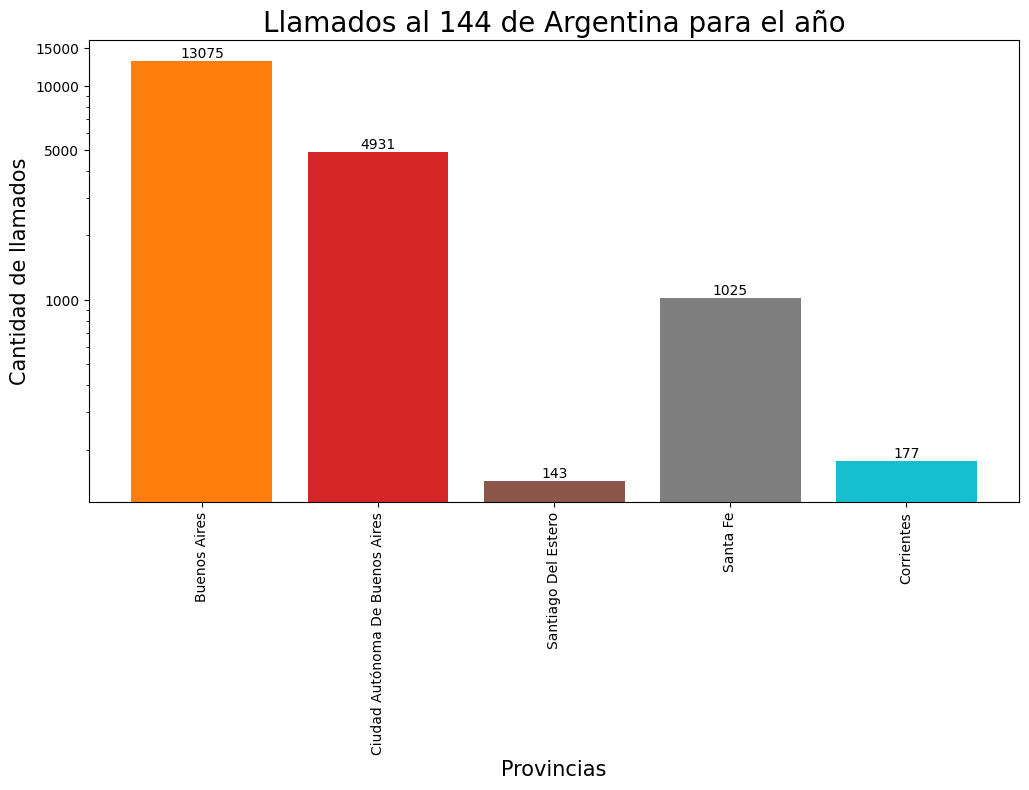

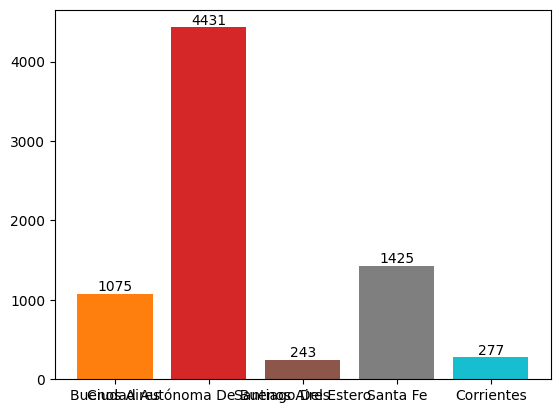

In [ ]:
import matplotlib.pyplot as plt
#no funciono la idea era crear un graf de barras con los datos de cada dic en un solo grafico teniendo para BsAs dos barras una para el primer
#año y otra para el segundo año
list2dic = [{
    'Buenos Aires': 13075,
    'Ciudad Autónoma De Buenos Aires': 4931,
    'Santiago Del Estero': 143,
    'Santa Fe': 1025,
    'Corrientes': 177
},{
    'Buenos Aires': 1075,
    'Ciudad Autónoma De Buenos Aires': 4431,
    'Santiago Del Estero': 243,
    'Santa Fe': 1425,
    'Corrientes': 277
}]

plt.figure(figsize=(12, 6))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.xlabel('Provincias', fontsize=15)
plt.ylabel('Cantidad de llamados', fontsize=15)
plt.title(f'Llamados al 144 de Argentina para el año', fontsize=20)

#Especifica las ubicaciones de las marcas en el eje Y (puedes ajustar según tus necesidades)
yticks_values = [10, 100, 1000, 5000,10000, 15000]
plt.yticks(yticks_values, [str(val) for val in yticks_values])

for dic in list2dic:
#plt.bar(cant_llamadas_por_provincia.keys(), cant_llamadas_por_provincia.values())
  for provincia, llamadas in dic.items():
      plt.bar(provincia, llamadas)
      plt.bar(provincia, llamadas)
      plt.text(provincia, llamadas, str(llamadas), ha='center', va='bottom', fontsize=10)
  plt.show()